In [1]:
import os
import sys
import re
from matplotlib import pyplot as plt
import json
import numpy as np

print(os.getcwd())

/Users/whhqund/Desktop/JHU/NeuroData/df-dn-paper/benchmarks/audition


plotting
6193.86859869957


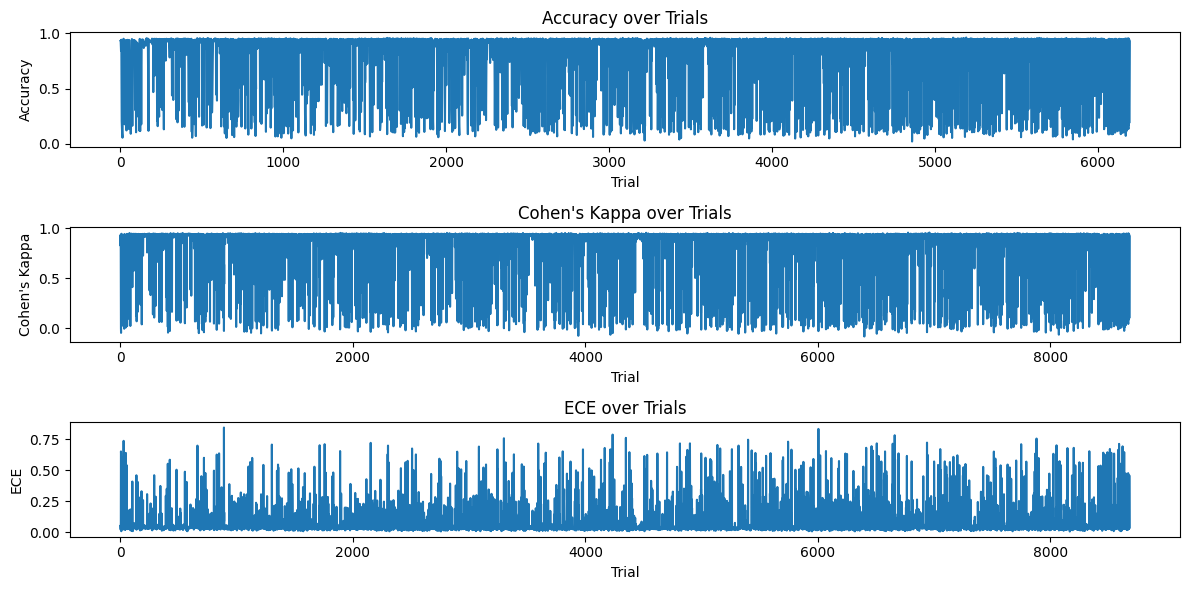

In [3]:
with open('/Users/whhqund/Desktop/JHU/NeuroData/df-dn-paper/benchmarks/audition/trial_metrics_2hr_2.txt', 'r') as file:
        data = file.read()

# Split the data into trials
trials = data.split("\n\n\n")  # Assuming three newlines separate each trial

bohb_accuracies = []
bohb_cohen_kappas = []
bohb_eces = []
bohb_trial_times = []

# Extract metrics for each trial
for trial in trials:
    if trial.strip():  # Check if trial data is not empty
        # Extract JSON string
        match = re.search(r'Trial Data:\s+({.*?})\s*$', trial, re.DOTALL)
        if match:
            json_str = match.group(1).replace("\n", "")
            trial_data = json.loads(json_str)

            # Append metrics to lists
            bohb_accuracies.append(trial_data['accuracy'])
            bohb_cohen_kappas.append(trial_data['cohens_kappa'])
            bohb_eces.append(trial_data['ece'])
            bohb_trial_times.append(trial_data['trial_duration'])
print("plotting")
print(sum(bohb_trial_times))

TRIAL_IDX = [0]
for i in range(len(bohb_trial_times)):
    TRIAL_IDX.append(bohb_trial_times[i] + TRIAL_IDX[i])
# print(TRIAL_IDX)
TRIAL_IDX = TRIAL_IDX[1:]
# Plotting
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(3, 1, 1)
plt.plot(TRIAL_IDX, bohb_accuracies, label='Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Trial')
plt.title('Accuracy over Trials')

# Plot Cohen's Kappa
plt.subplot(3, 1, 2)
plt.plot(bohb_cohen_kappas, label='Cohen\'s Kappa')
plt.ylabel('Cohen\'s Kappa')
plt.xlabel('Trial')
plt.title('Cohen\'s Kappa over Trials')

# Plot ECE
plt.subplot(3, 1, 3)
plt.plot(bohb_eces, label='ECE')
plt.ylabel('ECE')
plt.xlabel('Trial')
plt.title('ECE over Trials')

plt.tight_layout()
plt.show()

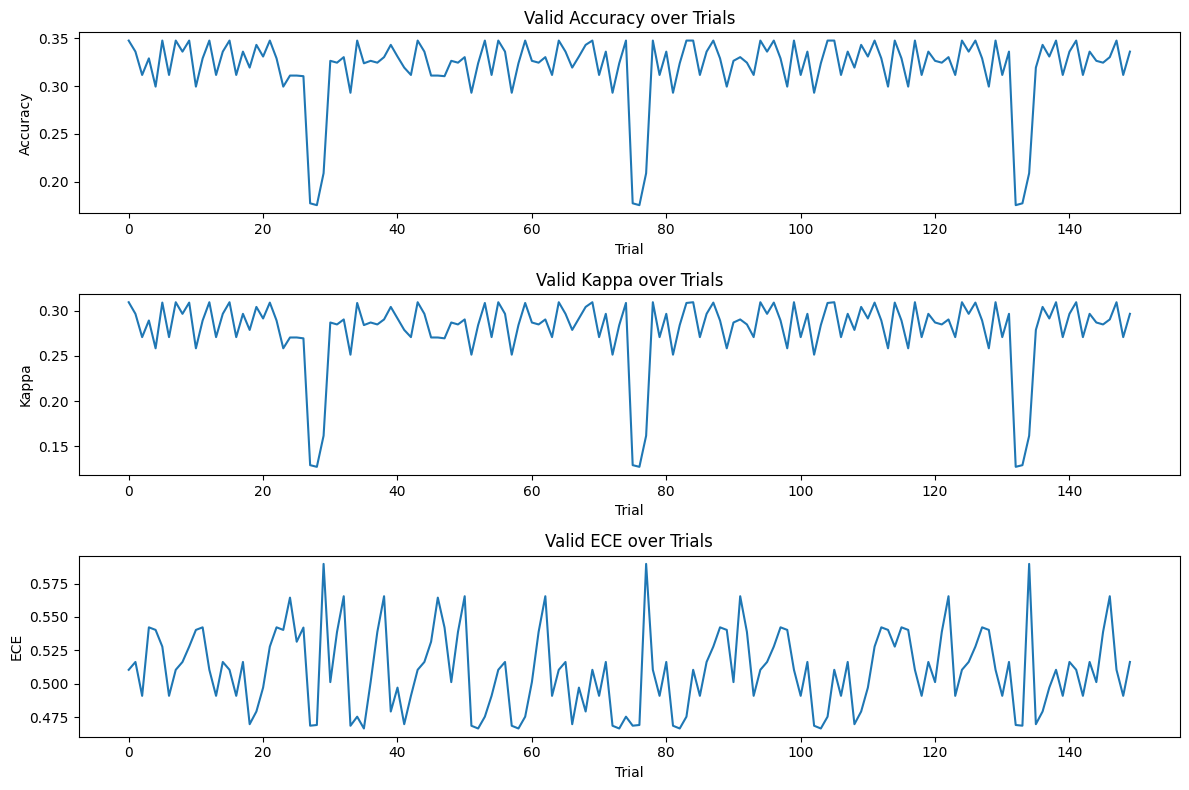

In [7]:
with open('/Users/whhqund/Desktop/JHU/NeuroData/df-dn-paper/benchmarks/audition/CNN32_BO_results_2h.txt', 'r') as file:
    data = file.readlines()

# Initialize lists to store the parsed data
bo_accuracy, bo_kappa, bo_ece, bo_time = [], [], [], []

# Parse the data
for line in data:
    # Using regular expression to find all the floating point numbers in each line
    if "Time: " in line:
        numbers = re.findall(r"[-+]?\d*\.\d+|\d+", line)
        if numbers:
            bo_accuracy.append(float(numbers[0]))
            bo_kappa.append(float(numbers[1]))
            bo_ece.append(float(numbers[2]))
            bo_time.append(float(numbers[3]))

# Plotting the data
plt.figure(figsize=(12, 8))

# Plotting Valid Accuracy
plt.subplot(3, 1, 1)
plt.plot(bo_accuracy)
plt.title('Valid Accuracy over Trials')
plt.xlabel('Trial')
plt.ylabel('Accuracy')

# Plotting Valid Kappa
plt.subplot(3, 1, 2)
plt.plot(bo_kappa)
plt.title('Valid Kappa over Trials')
plt.xlabel('Trial')
plt.ylabel('Kappa')

# Plotting Valid ECE
plt.subplot(3, 1, 3)
plt.plot(bo_ece)
plt.title('Valid ECE over Trials')
plt.xlabel('Trial')
plt.ylabel('ECE')

# Plotting Time
# plt.subplot(2, 2, 4)
# plt.plot(time, marker='o', linestyle='-')
# plt.title('Time over Trials')
# plt.xlabel('Trial')
# plt.ylabel('Time (s)')

# Adjust layout
plt.tight_layout()

# Save or display the plot
plt.show()

2.4886142080649734 6061.9197952747345


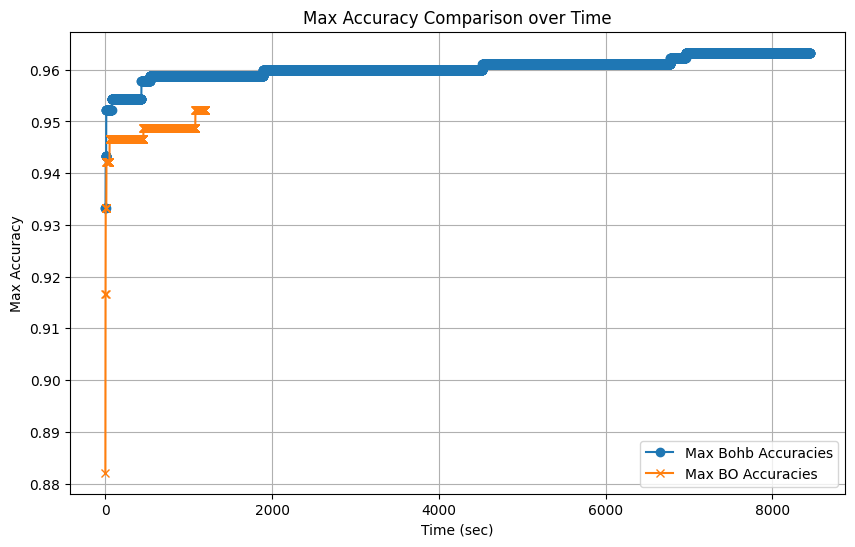

In [10]:
max_bobh_accs = np.maximum.accumulate(bohb_accuracies)
max_bo_accs = np.maximum.accumulate(bo_accuracy)

bo_cum_time = np.cumsum(bo_time)
bohb_cum_time = np.cumsum(bohb_trial_times)

print(bo_cum_time[-1], bohb_cum_time[-1])

# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(bohb_cum_time, max_bobh_accs, label='Max BOHB Accuracies', marker='o')
# plt.plot(bo_cum_time, max_bo_accs, label='Max BO Accuracies', marker='x')
plt.plot(max_bobh_accs, label='Max Bohb Accuracies', marker='o')
plt.plot(max_bo_accs, label='Max BO Accuracies', marker='x')
plt.title('Max Accuracy Comparison over Time')
plt.xlabel('Time (sec)')
# plt.title('Max Accuracy Comparison over Trials')
# plt.xlabel('Trial')
plt.ylabel('Max Accuracy')
plt.legend()
plt.grid(True)
plt.show()